In [1]:
import os
import sys

import numpy as np

from tqdm.auto import tqdm

In [2]:
from sklearn.metrics.pairwise import cosine_similarity

from matplotlib import pyplot

# inspect data

## load

In [3]:
# pip install scikit-learn mega.py

sys.path.append(os.path.abspath('../kcg-ml-vae-test/'))
from utilities.utils import read_embedding_data, read_msg_pack

In [4]:
file_path = '../kcg-ml-image-pipeline/output/environmental/ranking_v1/embeddings/000000_embedding.msgpack'

mp = read_msg_pack(file_path)

pos_emb, neg_emb = read_embedding_data(file_path)

In [5]:
mp.keys()

dict_keys(['job_uuid', 'creation_time', 'dataset', 'file_path', 'file_hash', 'positive_prompt', 'negative_prompt', 'positive_embedding', 'negative_embedding'])

In [6]:
mp['positive_prompt']

'environmental, pixel art, concept art, side scrolling, video game, neo city, (1 girl), white box, puffy lips, cinematic lighting, colorful, steampunk, partially submerged, original, 1girl, night, ribbon choker, see through top, black tissues, a masterpiece, high heel, hand on own crotch'

## check embedding

In [14]:
from transformers import AutoTokenizer, AutoModel

# model_name = 'laion/CLIP-ViT-bigG-14-laion2B-39B-b160k'
# model_name = 'openai/clip-vit-large-patch14'
# model_name = '../Llama-2-7b-hf'
# model_name = 'BAAI/bge-base-en-v1.5'

# model_name = 'bigscience/bloom-560m'
model_name = 'johngiorgi/declutr-base'

# tokenizer = AutoTokenizer.from_pretrained(model_name)
# transformer = AutoModel.from_pretrained(model_name).text_model.eval()

tokenizer = AutoTokenizer.from_pretrained(model_name)
# transformer = AutoModel.from_pretrained(model_name).eval()#.cuda()

# tokenizer.pad_token = "[PAD]"
# tokenizer.padding_side = "left"

'(MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /johngiorgi/declutr-base/resolve/main/tokenizer_config.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7f8300e50490>, 'Connection to huggingface.co timed out. (connect timeout=10)'))"), '(Request ID: d48b0536-0122-4255-ac88-99e0e1e1033b)')' thrown while requesting HEAD https://huggingface.co/johngiorgi/declutr-base/resolve/main/tokenizer_config.json


In [18]:
batch_encoding = tokenizer(
    mp['positive_prompt'],
    truncation=True, max_length=70, return_length=True,
    return_overflowing_tokens=False, padding="max_length", return_tensors="pt"
)

tokens = batch_encoding["input_ids"].to()

# clip_text_opt = transformer(input_ids=tokens)

# clip_text_opt.keys()

In [19]:
len(tokens[0])

70

In [20]:
tokenizer.convert_ids_to_tokens(tokens[0])

['<s>',
 'environment',
 'al',
 ',',
 'Ġpixel',
 'Ġart',
 ',',
 'Ġconcept',
 'Ġart',
 ',',
 'Ġside',
 'Ġscrolling',
 ',',
 'Ġvideo',
 'Ġgame',
 ',',
 'Ġneo',
 'Ġcity',
 ',',
 'Ġ(',
 '1',
 'Ġgirl',
 '),',
 'Ġwhite',
 'Ġbox',
 ',',
 'Ġp',
 'uffy',
 'Ġlips',
 ',',
 'Ġcinematic',
 'Ġlighting',
 ',',
 'Ġcolorful',
 ',',
 'Ġste',
 'ampunk',
 ',',
 'Ġpartially',
 'Ġsubmerged',
 ',',
 'Ġoriginal',
 ',',
 'Ġ1',
 'girl',
 ',',
 'Ġnight',
 ',',
 'Ġribbon',
 'Ġch',
 'oker',
 ',',
 'Ġsee',
 'Ġthrough',
 'Ġtop',
 ',',
 'Ġblack',
 'Ġtissues',
 ',',
 'Ġa',
 'Ġmasterpiece',
 ',',
 'Ġhigh',
 'Ġheel',
 ',',
 'Ġhand',
 'Ġon',
 'Ġown',
 'Ġcrotch',
 '</s>']

In [11]:
clip_emb, clip_pooler_output = clip_text_opt.last_hidden_state, clip_text_opt.pooler_output
clip_emb.shape, clip_pooler_output.shape

(torch.Size([1, 77, 768]), torch.Size([1, 768]))

In [16]:
np.abs(pos_emb - clip_emb.detach().cpu().numpy()).mean()

9.092783749300054e-07

### short sentence

In [ ]:
batch_encoding = tokenizer(
    'steampunk',
    truncation=True, max_length=77, return_length=True,
    return_overflowing_tokens=False, padding="max_length", return_tensors="pt"
)

tokens = batch_encoding["input_ids"].to(transformer.device)

clip_text_opt = transformer(input_ids=tokens)

short_emb = clip_text_opt.last_hidden_state.detach().cpu().numpy()

In [ ]:
pos_sim = cosine_similarity(short_emb[0])

In [ ]:
pyplot.imshow(pos_sim)
pyplot.colorbar()

### sentence vs single word

In [ ]:
one_word_encoding

In [ ]:
one_word_encoding = tokenizer('steampunk', return_tensors="pt")
one_word_opt = transformer(input_ids=one_word_encoding["input_ids"])
one_word_encoding

In [ ]:
one_word_emb = one_word_opt.last_hidden_state.detach().cpu().numpy()
one_pos_sim = cosine_similarity(one_word_emb[0], pos_emb[0])
pyplot.imshow(one_pos_sim)

In [ ]:
list(tokens[0].numpy()).index(24130)

In [ ]:
one_pos_sim[1, 33]

### short vs. single

In [ ]:
one_short_sim = cosine_similarity(one_word_emb[0], short_emb[0])
pyplot.imshow(one_short_sim)

In [ ]:
one_short_sim[1, 1]

In [ ]:
cosine_similarity(one_word_emb[0], short_emb[0].mean(axis=0, keepdims=True))

## analysis

In [7]:
pos_sim = cosine_similarity(pos_emb[0])

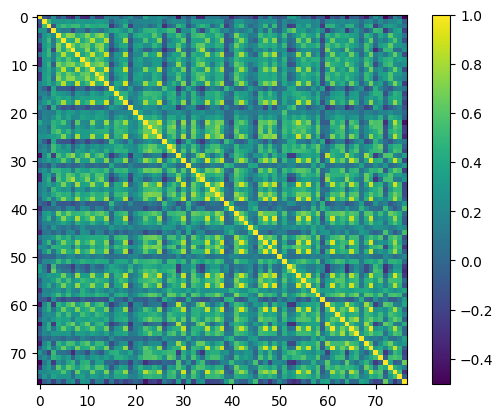

In [20]:
pyplot.imshow(pos_sim)
pyplot.colorbar()

In [ ]:
clip_text_opt.keys()

## check redundancy of dimension axis

### load dataset

In [ ]:
import glob

paths = sorted(glob.glob('/workspace/kk-digital/kcg-ml-image-pipeline/output/environmental/ranking_v2/embeddings/*_embedding.msgpack'))

pos_embs = []
for path in tqdm(paths):
    pos_emb, neg_emb = read_embedding_data(path)
    pos_embs.append(pos_emb)
pos_embs = np.concatenate(pos_embs, axis=0)

### successive vectors

In [ ]:
vector1 = pos_embs[:, :-1]
vector2 = pos_embs[:, 1:]

norm1 = np.linalg.norm(vector1, axis=-1)
norm2 = np.linalg.norm(vector2, axis=-1)

In [ ]:
dot_product = (vector1 * vector2).sum(axis=-1)

cos = dot_product / (norm1 * norm2)

In [ ]:
pyplot.hist(cos.flatten(), bins=100, density=True)
pyplot.title('histogram: cosine similarity of successive vectors')

### sentences

In [ ]:
cos = cosine_similarity(pos_embs.mean(axis=1))

In [ ]:
pyplot.hist(cos.flatten(), bins=100, density=True)
pyplot.title('histogram: cosine similarity between sentences')

### fit PCA model

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
x = pos_embs.reshape(-1, pos_embs.shape[-1])

In [ ]:
z = pca.fit_transform(x)

In [ ]:
pyplot.plot(np.cumsum(pca.explained_variance_ratio_))
pyplot.title('factor variance ratio of PCA')

### keep top components

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [ ]:
norm1 = np.linalg.norm(x, axis=-1)

results = list()

for num_dims in [32, 64, 128, 256]:
    
    x_ = z[..., :num_dims] @ pca.components_[:num_dims] + pca.mean_

    norm2 = np.linalg.norm(x_, axis=-1)

    dot_product = (x * x_).sum(axis=-1)

    cos = dot_product / (norm1 * norm2)

    mse = ((x - x_) ** 2).mean(axis=-1)
    
    result = pd.DataFrame(data=np.stack([cos, mse], axis=-1), columns=['cos', 'mse'])
    result['num_dims'] = num_dims

    results.append(result)
    
    print(f'{num_dims} cos: {cos.mean():.4f} mse: {mse.mean():.4f}')
    
results = pd.concat(results, axis=0)

In [ ]:
def draw_ridge_plots(df, value_col, category_col):
    
    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(df, row=category_col, hue=category_col, aspect=10, height=.5, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, value_col,
          bw_adjust=.5, clip_on=False,
          fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, value_col, clip_on=False, color="w", lw=2, bw_adjust=.5)

    # passing color=None to refline() uses the hue mapping
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = pyplot.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)


    g.map(label, value_col)

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)
    
    return g

In [ ]:
draw_ridge_plots(results, 'cos', 'num_dims')

In [ ]:
draw_ridge_plots(results, 'mse', 'num_dims')

# save & load

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

import torch

In [2]:
torch.cuda.memory_reserved()

0

In [3]:
torch.cuda.memory_allocated()

0

In [8]:
torch.cuda.mem_get_info()

(24541659136, 25393692672)

In [1]:
import torch
import os
import sys
sys.path.append(os.path.abspath('../kcg-ml-image-pipeline/'))

In [2]:
from utility.clip.clip_text_embedder import CLIPTextEmbedder

INFO: Created a temporary directory at /tmp/tmpg9nl5_qp
INFO: Writing /tmp/tmpg9nl5_qp/_remote_module_non_scriptable.py


In [3]:
clip_text_embedder = CLIPTextEmbedder()

In [4]:
clip_text_embedder.load_submodels();

Loading tokenizer and transformer...[DONE]	2,115.71ms                             


In [5]:
results = clip_text_embedder(['1,2,3','4,5,6'])

In [6]:
results[0].embedding.shape

(77, 768)

In [7]:
from data_loader.clip_text_embedder_output import attention_pooling, PooledCLIPTextEmbedderOutput

In [8]:
pooled_results = attention_pooling(results)

In [9]:
msgpack_bytes = pooled_results[0].get_msgpack_string()

In [10]:
PooledCLIPTextEmbedderOutput.from_msgpack_string(msgpack_bytes).pooled_embedding.shape

(768,)